In [1]:
import os
image_dir = 'images'
gallery_dir = 'images/gallery_paintings'

list_imgs = os.listdir(gallery_dir)
print(f"There are {len(list_imgs)} images in the dataset {gallery_dir}")

There are 31 images in the dataset images/gallery_paintings


In [2]:
%pip install torchvision matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
from torchvision import datasets, transforms
import torch

# create dataloader with required transforms 
tc = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor()              
    ])

image_datasets = datasets.ImageFolder(image_dir, transform=tc)
dloader = torch.utils.data.DataLoader(image_datasets, batch_size=10, shuffle=False)
print(len(image_datasets))

/Users/jaimielee/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/jaimielee/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/jaimielee/Library/Python/3.9/lib/python/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


31


torch.Size([256, 256, 3])
tensor([[[0.4314, 0.4784, 0.4706,  ..., 0.4745, 0.4745, 0.3373],
         [0.4471, 0.4784, 0.4510,  ..., 0.4706, 0.4235, 0.3137],
         [0.4314, 0.4588, 0.4510,  ..., 0.4745, 0.4157, 0.3020],
         ...,
         [0.3725, 0.4392, 0.4745,  ..., 0.3882, 0.2980, 0.3333],
         [0.3686, 0.4549, 0.4431,  ..., 0.3765, 0.3176, 0.3686],
         [0.3490, 0.4157, 0.3765,  ..., 0.3608, 0.3176, 0.3529]],

        [[0.4863, 0.5804, 0.5922,  ..., 0.4980, 0.4784, 0.3294],
         [0.5176, 0.5961, 0.5922,  ..., 0.5216, 0.4627, 0.3255],
         [0.5137, 0.5922, 0.5922,  ..., 0.5412, 0.4588, 0.3137],
         ...,
         [0.2863, 0.3451, 0.3608,  ..., 0.3020, 0.2196, 0.2392],
         [0.2667, 0.3451, 0.3333,  ..., 0.2902, 0.2471, 0.2784],
         [0.2667, 0.3137, 0.2784,  ..., 0.2627, 0.2275, 0.2471]],

        [[0.5608, 0.6980, 0.7333,  ..., 0.4980, 0.4588, 0.2980],
         [0.6078, 0.7373, 0.7529,  ..., 0.5647, 0.4863, 0.3294],
         [0.6078, 0.7490, 0.7569

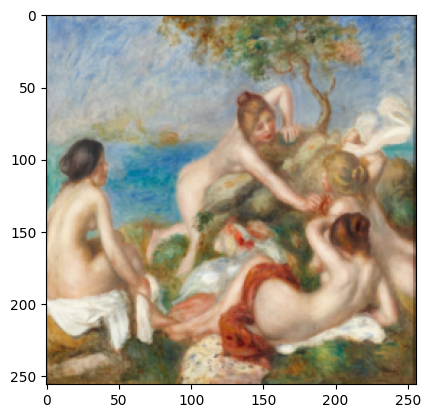

In [4]:
import numpy as np
import matplotlib.pyplot as plt

i=0
for img, _ in dloader:
      print(np.transpose(img[0], (1,2,0)).shape)
      print(img[i])
      plt.imshow((img[i].detach().numpy().transpose(1, 2, 0)*255).astype(np.uint8))
      plt.show()
      i = i + 1
      break

In [6]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50')

# Select the desired layer
layer = model._modules.get('avgpool')

outputs = []
def copy_embeddings(m, i, o):
    """Copy embeddings from the penultimate layer.
    """
    o = o[:, :, 0, 0].detach().numpy().tolist()
    outputs.append(o)

# attach hook to the penulimate layer
_ = layer.register_forward_hook(copy_embeddings)

model.eval()

Using cache found in /Users/jaimielee/.cache/torch/hub/pytorch_vision_v0.10.0


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [7]:
# Generate image's embeddings for all images in dloader and saves 
# them in the list outputs
for img, _ in dloader:
    _ = model(img)
print(len(outputs))

4


In [8]:
# flatten list of embeddings to remove batches
list_embeddings = [item for sublist in outputs for item in sublist]

print(len(list_embeddings))
print(np.array(list_embeddings[0]).shape)

31
(2048,)


In [9]:
list_embeddings

[[0.0,
  0.0,
  3.592118740081787,
  8.478572845458984,
  4.931521892547607,
  12.195727348327637,
  0.6225978136062622,
  0.1453961730003357,
  11.13093090057373,
  0.0838971957564354,
  15.93778133392334,
  12.156490325927734,
  4.354298114776611,
  17.31831932067871,
  36.29862976074219,
  0.01979810558259487,
  24.27215576171875,
  9.747628211975098,
  0.48944416642189026,
  0.44265851378440857,
  2.149358034133911,
  1.3050373792648315,
  7.777656555175781,
  18.71445083618164,
  0.4471151828765869,
  0.1397469937801361,
  0.0027205049991607666,
  4.489278316497803,
  18.363508224487305,
  25.43906021118164,
  18.719331741333008,
  11.11697769165039,
  0.8871208429336548,
  17.119489669799805,
  23.522796630859375,
  14.835049629211426,
  14.69791030883789,
  45.682613372802734,
  12.678820610046387,
  0.1356351375579834,
  0.357754647731781,
  12.912528991699219,
  28.14434051513672,
  5.518143653869629,
  24.612897872924805,
  21.133821487426758,
  4.4212965965271,
  15.82435989